--- Step 1: Ready to upload your CSV file ---
Please upload the 'API_SP.POP.TOTL_DS2_en_csv_v2_20333.csv' file.


Saving API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv to API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv

--- Step 2: File 'API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv' uploaded successfully! ---
Now processing the data...
Data processing complete.

--- Step 3: Generating your plots ---


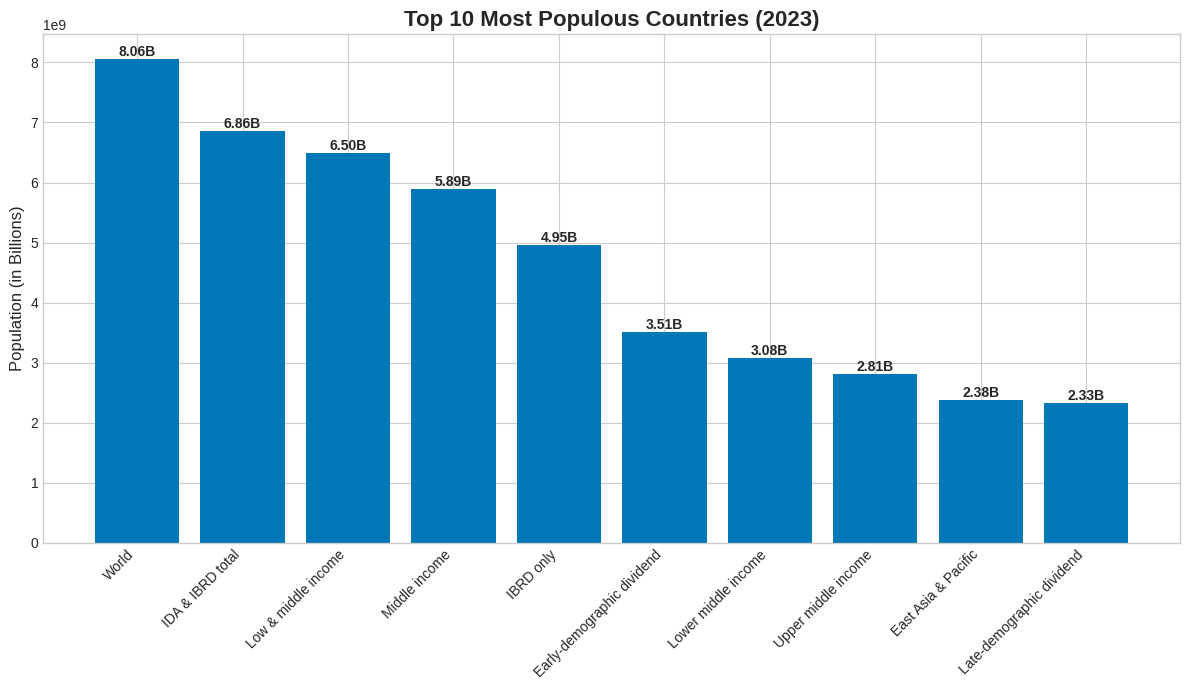

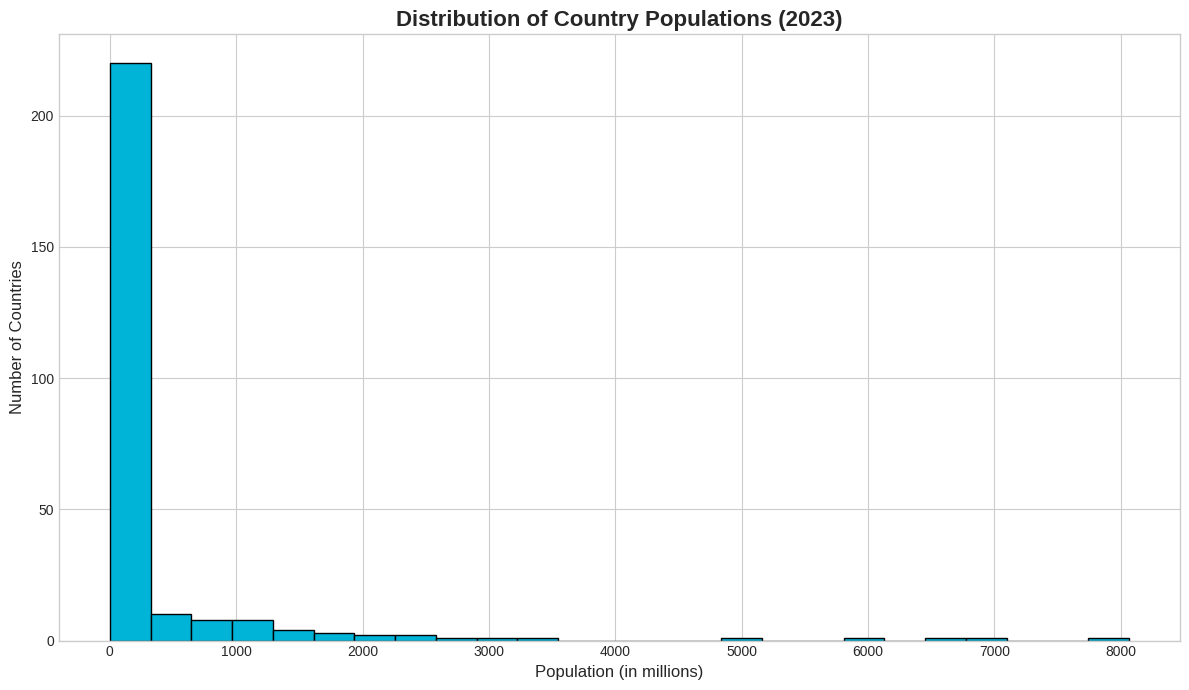


--- All tasks complete! ---


In [1]:
# CODECRAFT Internship Task 1: Population Analysis
# By Akshara Shree

# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

print("--- Step 1: Ready to upload your CSV file ---")
print("Please upload the 'API_SP.POP.TOTL_DS2_en_csv_v2_20333.csv' file.")

# This command will open a file upload dialog in your browser
uploaded = files.upload()

# Get the name of the uploaded file
file_name = next(iter(uploaded))

print(f"\n--- Step 2: File '{file_name}' uploaded successfully! ---")
print("Now processing the data...")

# --- Data Loading and Cleaning ---
df = pd.read_csv(file_name, skiprows=4)
year_to_analyze = "2023"

population_df = df[["Country Name", year_to_analyze]].dropna()
population_df.columns = ["Country", "Population"]
population_df["Population"] = population_df["Population"].astype(int)
sorted_df = population_df.sort_values(by="Population", ascending=False)

print("Data processing complete.")
print("\n--- Step 3: Generating your plots ---")

# --- Visualization 1: Top 10 Most Populous Countries ---
top_10 = sorted_df.head(10)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
bars = plt.bar(top_10["Country"], top_10["Population"], color='#0077B6')
plt.title(f'Top 10 Most Populous Countries ({year_to_analyze})', fontsize=16, fontweight='bold')
plt.ylabel('Population (in Billions)', fontsize=12)
plt.xticks(rotation=45, ha="right")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e9:.2f}B',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# --- Visualization 2: Histogram of Population Distribution ---
plt.figure(figsize=(12, 7))
plt.hist(sorted_df["Population"] / 1e6, bins=25, color='#00B4D8', edgecolor='black')
plt.title(f'Distribution of Country Populations ({year_to_analyze})', fontsize=16, fontweight='bold')
plt.xlabel('Population (in millions)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.tight_layout()
plt.show()

print("\n--- All tasks complete! ---")